# 1. Perkenalan Dataset

Dataset ini memberikan gambaran menyeluruh tentang berbagai faktor yang memengaruhi kinerja siswa dalam ujian. Termasuk informasi tentang kebiasaan belajar, kehadiran, keterlibatan orang tua, dan aspek lain yang memengaruhi keberhasilan akademis.

## Deskripsi Kolom

|Atribut| Deskripsi |
|--|--|
| Hours_Studied | Jumlah jam yang dihabiskan untuk belajar per minggu. |
| Attendance | Persentase kelas yang dihadiri. |
| Parental_Involvement | Tingkat keterlibatan orang tua dalam pendidikan siswa (Low, Medium, High). |
| Access_to_Resources | Ketersediaan sumber daya pendidikan (Low, Medium, High). |
| Extracurricular_Activities | Partisipasi dalam kegiatan ekstrakurikuler (Ya, Tidak). |
| Sleep_Hours | Rata-rata jumlah jam tidur per malam. |
| Previous_Scores | Nilai ujian sebelumnya |
| Motivation_Level | Tingkat motivasi siswa (Low, Medium, High). |
| Internet_Access | Ketersediaan akses internet (Yes, No). |
| Tutoring_Sessions | Jumlah sesi bimbingan belajar yang dihadiri per bulan. |
| Family_Income | Tingkat pendapatan keluarga (Low, Medium, High). |
| Teacher_Quality | Kualitas Guru (Low, Medium, High) |
| School_Type | Jenis sekolah yang dihadiri (Public, Private) |
| Peer_Influence | Pengaruh teman sebaya terhadap prestasi akademik (Positive, Neutral, Negative) |
| Physical_Activity | Rata-rata jumlah jam aktivitas fisik per minggu. |
| Learning_Disabilities | Adanya kesulitan belajar (Yes, No). |
| Parental_Education_Level | Tingkat pendidikan tertinggi orang tua (High School, College, Postgraduate). |
| Distance_from_Home | Jarak dari rumah ke sekolah (Near, Moderate, Far). |
| Gender | Jenis kelamin siswa (Male, Female). |
| Exam_Score | Nilai ujian akhir. |


# 2. Import Library

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# 3. Memuat Dataset

In [23]:
ds = pd.read_csv('Dataset_inisiasi.csv')
ds.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# 4. Exploratory Data Analysis (EDA)

In [24]:
# membuat salinan dataset
ds_cleaned = ds.copy()

## 1. Memahami Struktur Data

In [25]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
ds_cleaned.info() 
ds_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

(6607, 20)

Dataset ini memiliki **6607 baris** data, dan **20 kolom**

In [26]:
numerical_cols = ds_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = ds_cleaned.select_dtypes(include=['object']).columns.tolist()

print(f'Jumlah Fitur: {len(categorical_cols) + len(numerical_cols)}')
print(f'Jumlah fitur numerik: {len(numerical_cols)}')
print(f'Jumlah fitur kategorikal: {len(categorical_cols)}\n')
print(f'Daftar fitur kategorikal:\n{categorical_cols}\n')
print(f'Daftar fitur numerikal:\n{numerical_cols}')

Jumlah Fitur: 20
Jumlah fitur numerik: 7
Jumlah fitur kategorikal: 13

Daftar fitur kategorikal:
['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Daftar fitur numerikal:
['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


## 2. Menangani Data yang Hilang

In [27]:
missing_values = ds_cleaned.isnull().sum()
percentage_missing_values = (missing_values / ds_cleaned.shape[0]) * 100

print(f'Total nilai yang kosong: {missing_values.sum()}')
print(f'Persentase nilai yang kosong: {percentage_missing_values.sum():.2f}%\n')

missing_values_ds = pd.DataFrame(percentage_missing_values[missing_values>0], columns=['percentage_missing_values'])
missing_values_ds['number_of_missing_values'] = missing_values[missing_values>0]

missing_values_ds

Total nilai yang kosong: 235
Persentase nilai yang kosong: 3.56%



,percentage_missing_values,number_of_missing_values
Teacher_Quality,1.180566,78
Parental_Education_Level,1.362192,90
Distance_from_Home,1.014076,67


In [28]:
# Drop the null values
ds_cleaned.dropna(axis=0, inplace=True)

missing_values = ds_cleaned.isnull().sum()
percentage_missing_values = (missing_values / ds_cleaned.shape[0]) * 100

print(f'Total nilai yang kosong: {missing_values.sum()}')
print(f'Persentase nilai yang kosong: {percentage_missing_values.sum():.2f}%\n')

missing_values_ds = pd.DataFrame(percentage_missing_values[missing_values>0], columns=['percentage_missing_values'])
missing_values_ds['number_of_missing_values'] = missing_values[missing_values>0]

missing_values_ds

Total nilai yang kosong: 0
Persentase nilai yang kosong: 0.00%



,percentage_missing_values,number_of_missing_values


Diketahui data yang hilang sebanyak 3.56% saja. Karena data yang hilang adalah kecil, jadi saya akan menangani data yang hilang dengan teknik drop pada baris yang memiliki data yang hilang.

## 3. Analisis Distribusi, Visualisasi, dan Korelasi

In [29]:
# Menampilkan statistik deskriptif dari dataset
ds_cleaned.describe(include="all")

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6378.000000,6378.000000,6378,6378,6378,6378.000000,6378.000000,6378,6378,6378.000000,6378,6378,6378,6378,6378.000000,6378,6378,6378,6378,6378.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3251,3204,3807,NaN,NaN,3237,5893,NaN,2582,3826,4434,2553,NaN,5710,3159,3801,3688,NaN
mean,19.977109,80.020853,NaN,NaN,NaN,7.034964,75.066165,NaN,NaN,1.495296,NaN,NaN,NaN,NaN,2.972719,NaN,NaN,NaN,NaN,67.252117
std,5.985460,11.550723,NaN,NaN,NaN,1.468033,14.400389,NaN,NaN,1.233984,NaN,NaN,NaN,NaN,1.028926,NaN,NaN,NaN,NaN,3.914217
min,1.000000,60.000000,NaN,NaN,NaN,4.000000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.000000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.000000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.000000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


In [30]:
# Menampilkan statistik deskriptif dari dataset yang hanya berisi fitur numerik
stat_desc_num = ds_cleaned[numerical_cols].describe().T
stat_desc_num

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


Berdasarkan output statistik deskriptif dari fitur numerik pada dataset, berikut adalah beberapa analisis yang dapat dilakukan:

1. **Hours_Studied (Jam Belajar)**
    - Rata-rata jam belajar siswa per minggu adalah sekitar 19.98 jam.
    - Jam belajar minimum adalah 1 jam dan maksimum adalah 44 jam.
    - Sebagian besar siswa belajar antara 16 hingga 24 jam per minggu (kuartil pertama hingga ketiga).

2. **Attendance (Kehadiran)**
    - Rata-rata persentase kehadiran siswa adalah sekitar 80.02%.
    - Persentase kehadiran minimum adalah 60% dan maksimum adalah 100%.
    - Sebagian besar siswa memiliki persentase kehadiran antara 70% hingga 90%.

3. **Sleep_Hours (Jam Tidur)**
    - Rata-rata jam tidur siswa per malam adalah sekitar 7.03 jam.
    - Jam tidur minimum adalah 4 jam dan maksimum adalah 10 jam.
    - Sebagian besar siswa tidur antara 6 hingga 8 jam per malam.

4. **Previous_Scores (Nilai Sebelumnya)**
    - Rata-rata nilai ujian sebelumnya adalah sekitar 75.07.
    - Nilai ujian sebelumnya minimum adalah 50 dan maksimum adalah 100.
    - Sebagian besar siswa memiliki nilai ujian sebelumnya antara 63 hingga 88.

5. **Tutoring_Sessions (Sesi Bimbingan)**
    - Rata-rata jumlah sesi bimbingan belajar yang dihadiri siswa per bulan adalah sekitar 1.50 sesi.
    - Jumlah sesi bimbingan minimum adalah 0 dan maksimum adalah 8 sesi.
    - Sebagian besar siswa menghadiri antara 1 hingga 2 sesi bimbingan per bulan.

6. **Physical_Activity (Aktivitas Fisik)**
    - Rata-rata jumlah jam aktivitas fisik siswa per minggu adalah sekitar 2.97 jam.
    - Jumlah jam aktivitas fisik minimum adalah 0 dan maksimum adalah 6 jam.
    - Sebagian besar siswa melakukan aktivitas fisik antara 2 hingga 4 jam per minggu.

7. **Exam_Score (Nilai Ujian)**
    - Rata-rata nilai ujian akhir siswa adalah sekitar 67.25.
    - Nilai ujian minimum adalah 55 dan maksimum adalah 101. Nilai maksimum akan diganti dengan 100, karena mungkin terjadi human error saat menginput nilai siswa.
    - Sebagian besar siswa memiliki nilai ujian antara 65 hingga 69.

Dari analisis ini, kita dapat melihat distribusi dan rentang nilai dari setiap fitur numerik dalam dataset. Informasi ini dapat membantu dalam memahami karakteristik data dan mengidentifikasi potensi anomali atau outlier yang mungkin memerlukan perhatian lebih lanjut.

In [39]:
# mengganti nilai 101 menjadi 100 pada Exam_Score
ds_cleaned['Exam_Score'] = ds_cleaned['Exam_Score'].replace(101, 100)

# cek kembali data tipe numerikal
ds_cleaned[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.251960,3.912884,55.0,65.0,67.0,69.0,100.0


In [31]:
# Menampilkan histogram dan plotbox distribusi dari fitur numerik
def plt_histogram_boxplot(ds_cleaned, columns=None, bins=30):
    
    if columns is None:
        columns = ds_cleaned.select_dtypes(include=['number']).columns
    
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 5 * num_cols))
    for i, col in enumerate(columns):
        
        sns.histplot(ds_cleaned[col], bins=bins, kde=True, ax=axes[i, 0], color="blue")
        axes[i, 0].set_title(f'Histogram of {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('Frequency')
        
        sns.boxplot(x=ds_cleaned[col], ax=axes[i, 1], color="red")
        axes[i, 1].set_title(f'Boxplot of {col}')
        axes[i, 1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

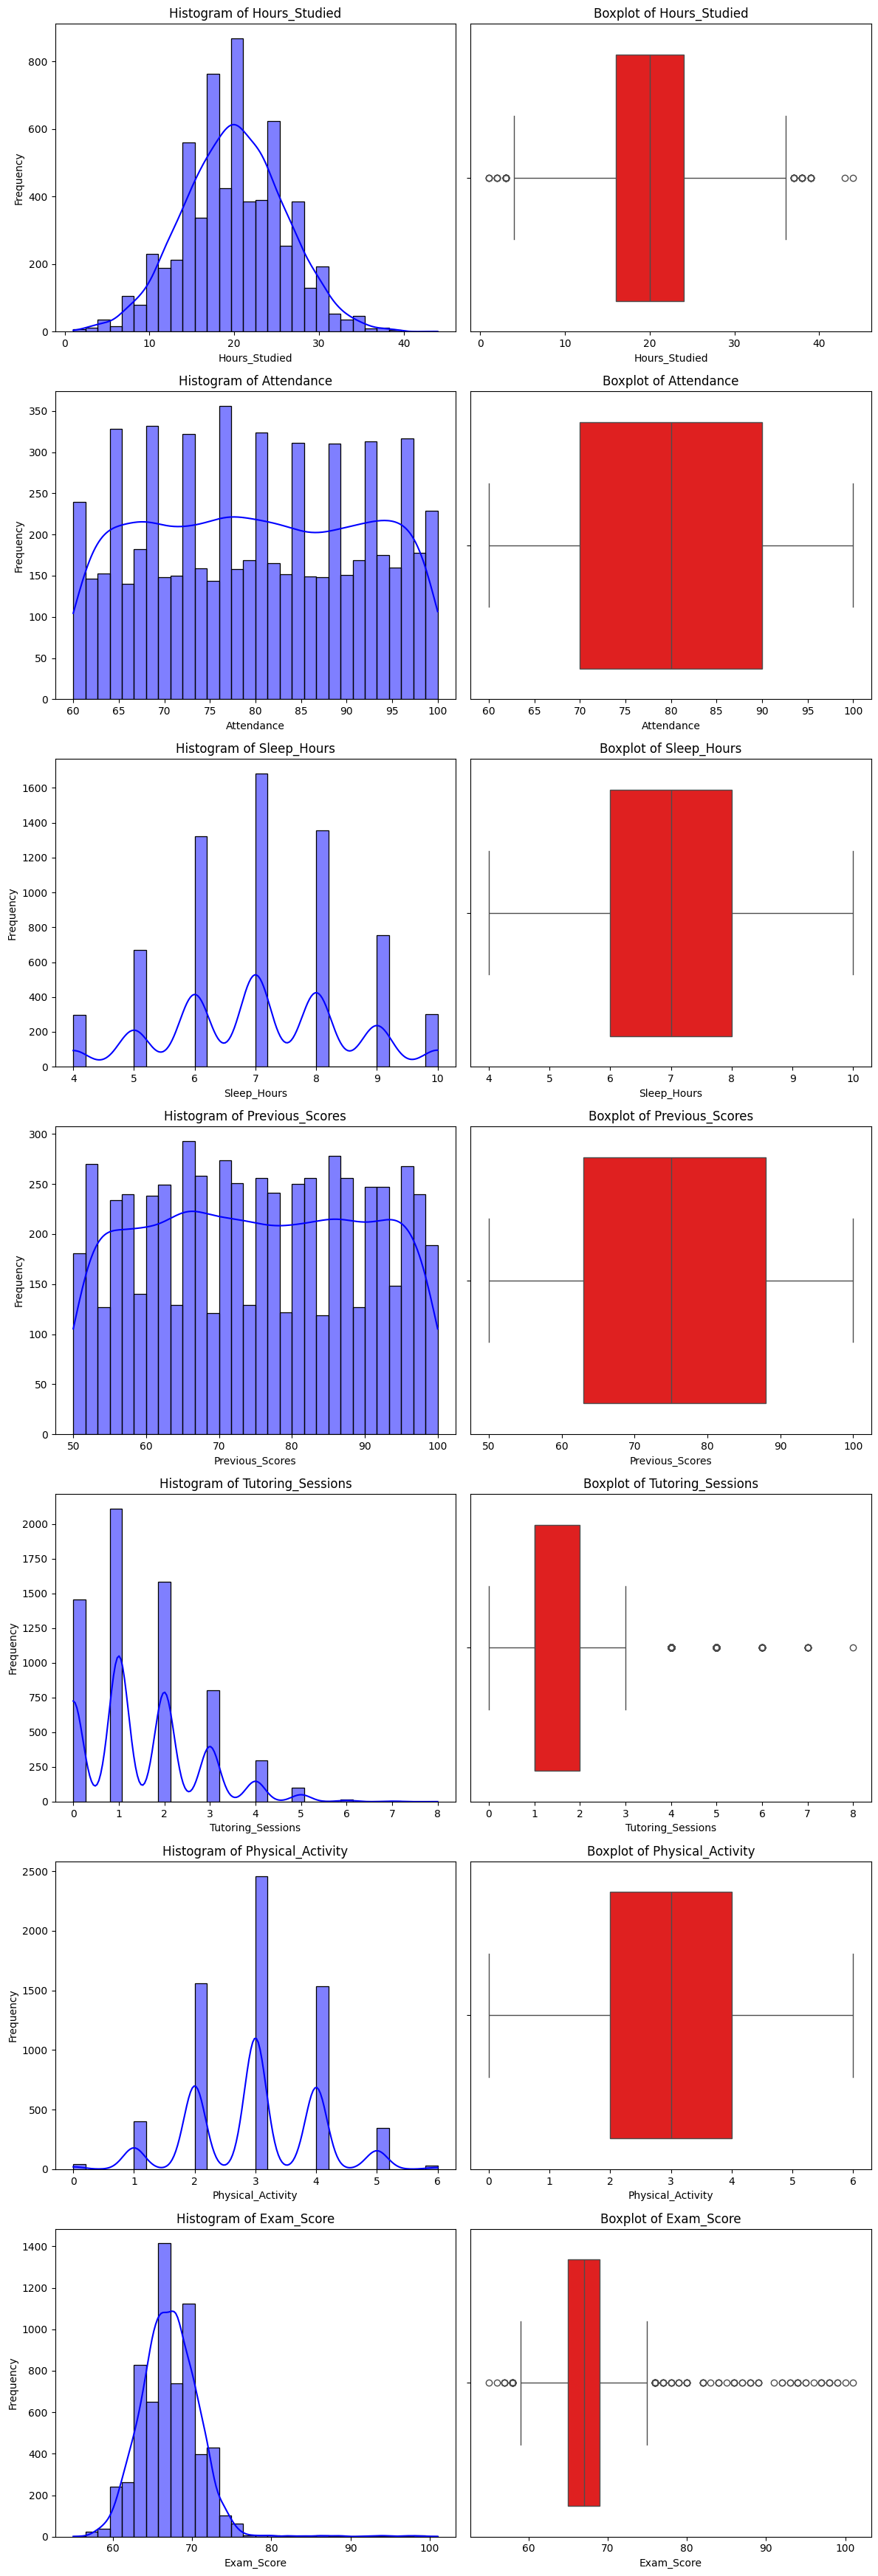

In [32]:
histo_box = plt_histogram_boxplot(ds_cleaned)
histo_box

Berdasarkan hasil gambar histogram dan boxplot dari fitur-fitur numerik, berikut adalah analisis rentang nilai, kecenderungan pusat, potensi outliers, serta potensi skewness yang ada:

1. **Hours_Studied (Jam Belajar)**
    - **Rentang Nilai**: 1 hingga 44 jam per minggu.
    - **Kecenderungan Pusat**: Rata-rata sekitar 20 jam per minggu.
    - **Potensi Outliers**: Ada beberapa outliers di atas 40 jam per minggu.
    - **Potensi Skewness**: Distribusi cenderung sedikit skewed ke kanan (positif skewness).

2. **Attendance (Kehadiran)**
    - **Rentang Nilai**: 60% hingga 100%.
    - **Kecenderungan Pusat**: Rata-rata sekitar 80%.
    - **Potensi Outliers**: Tidak ada outliers yang signifikan.
    - **Potensi Skewness**: Distribusi cenderung normal.

3. **Sleep_Hours (Jam Tidur)**
    - **Rentang Nilai**: 4 hingga 10 jam per malam.
    - **Kecenderungan Pusat**: Rata-rata sekitar 7 jam per malam.
    - **Potensi Outliers**: Tidak ada outliers yang signifikan.
    - **Potensi Skewness**: Distribusi cenderung normal.

4. **Previous_Scores (Nilai Sebelumnya)**
    - **Rentang Nilai**: 50 hingga 100.
    - **Kecenderungan Pusat**: Rata-rata sekitar 75.
    - **Potensi Outliers**: Tidak ada outliers yang signifikan.
    - **Potensi Skewness**: Distribusi cenderung normal.

5. **Tutoring_Sessions (Sesi Bimbingan)**
    - **Rentang Nilai**: 0 hingga 8 sesi per bulan.
    - **Kecenderungan Pusat**: Rata-rata sekitar 1.5 sesi per bulan.
    - **Potensi Outliers**: Ada beberapa outliers di atas 6 sesi per bulan.
    - **Potensi Skewness**: Distribusi cenderung skewed ke kanan (positif skewness).

6. **Physical_Activity (Aktivitas Fisik)**
    - **Rentang Nilai**: 0 hingga 6 jam per minggu.
    - **Kecenderungan Pusat**: Rata-rata sekitar 3 jam per minggu.
    - **Potensi Outliers**: Tidak ada outliers yang signifikan.
    - **Potensi Skewness**: Distribusi cenderung normal.

7. **Exam_Score (Nilai Ujian)**
    - **Rentang Nilai**: 55 hingga 100.
    - **Kecenderungan Pusat**: Rata-rata sekitar 67.
    - **Potensi Outliers**: Ada beberapa outliers di bawah 60 dan di atas 90.
    - **Potensi Skewness**: Distribusi cenderung sedikit skewed ke kiri (negatif skewness).

Secara keseluruhan, sebagian besar fitur numerik memiliki distribusi yang cukup normal dengan beberapa outliers yang perlu diperhatikan, terutama pada fitur `Hours_Studied`, `Tutoring_Sessions`, dan `Exam_Score`. Outliers ini dapat mempengaruhi analisis lebih lanjut dan mungkin memerlukan penanganan khusus. Potensi skewness juga perlu diperhatikan karena dapat mempengaruhi hasil analisis statistik dan model prediktif.

In [33]:
cat_desc = ds_cleaned[categorical_cols].describe().T
cat_desc['freq_percentage(%)'] = cat_desc['freq'] / ds_cleaned.shape[0] * 100
cat_desc

,count,unique,top,freq,freq_percentage(%)
Parental_Involvement,6378,3,Medium,3251,50.972092
Access_to_Resources,6378,3,Medium,3204,50.235183
Extracurricular_Activities,6378,2,Yes,3807,59.689558
Motivation_Level,6378,3,Medium,3237,50.752587
Internet_Access,6378,2,Yes,5893,92.395735
Family_Income,6378,3,Low,2582,40.48291
Teacher_Quality,6378,3,Medium,3826,59.987457
School_Type,6378,2,Public,4434,69.520226
Peer_Influence,6378,3,Positive,2553,40.028222
Learning_Disabilities,6378,2,No,5710,89.526497


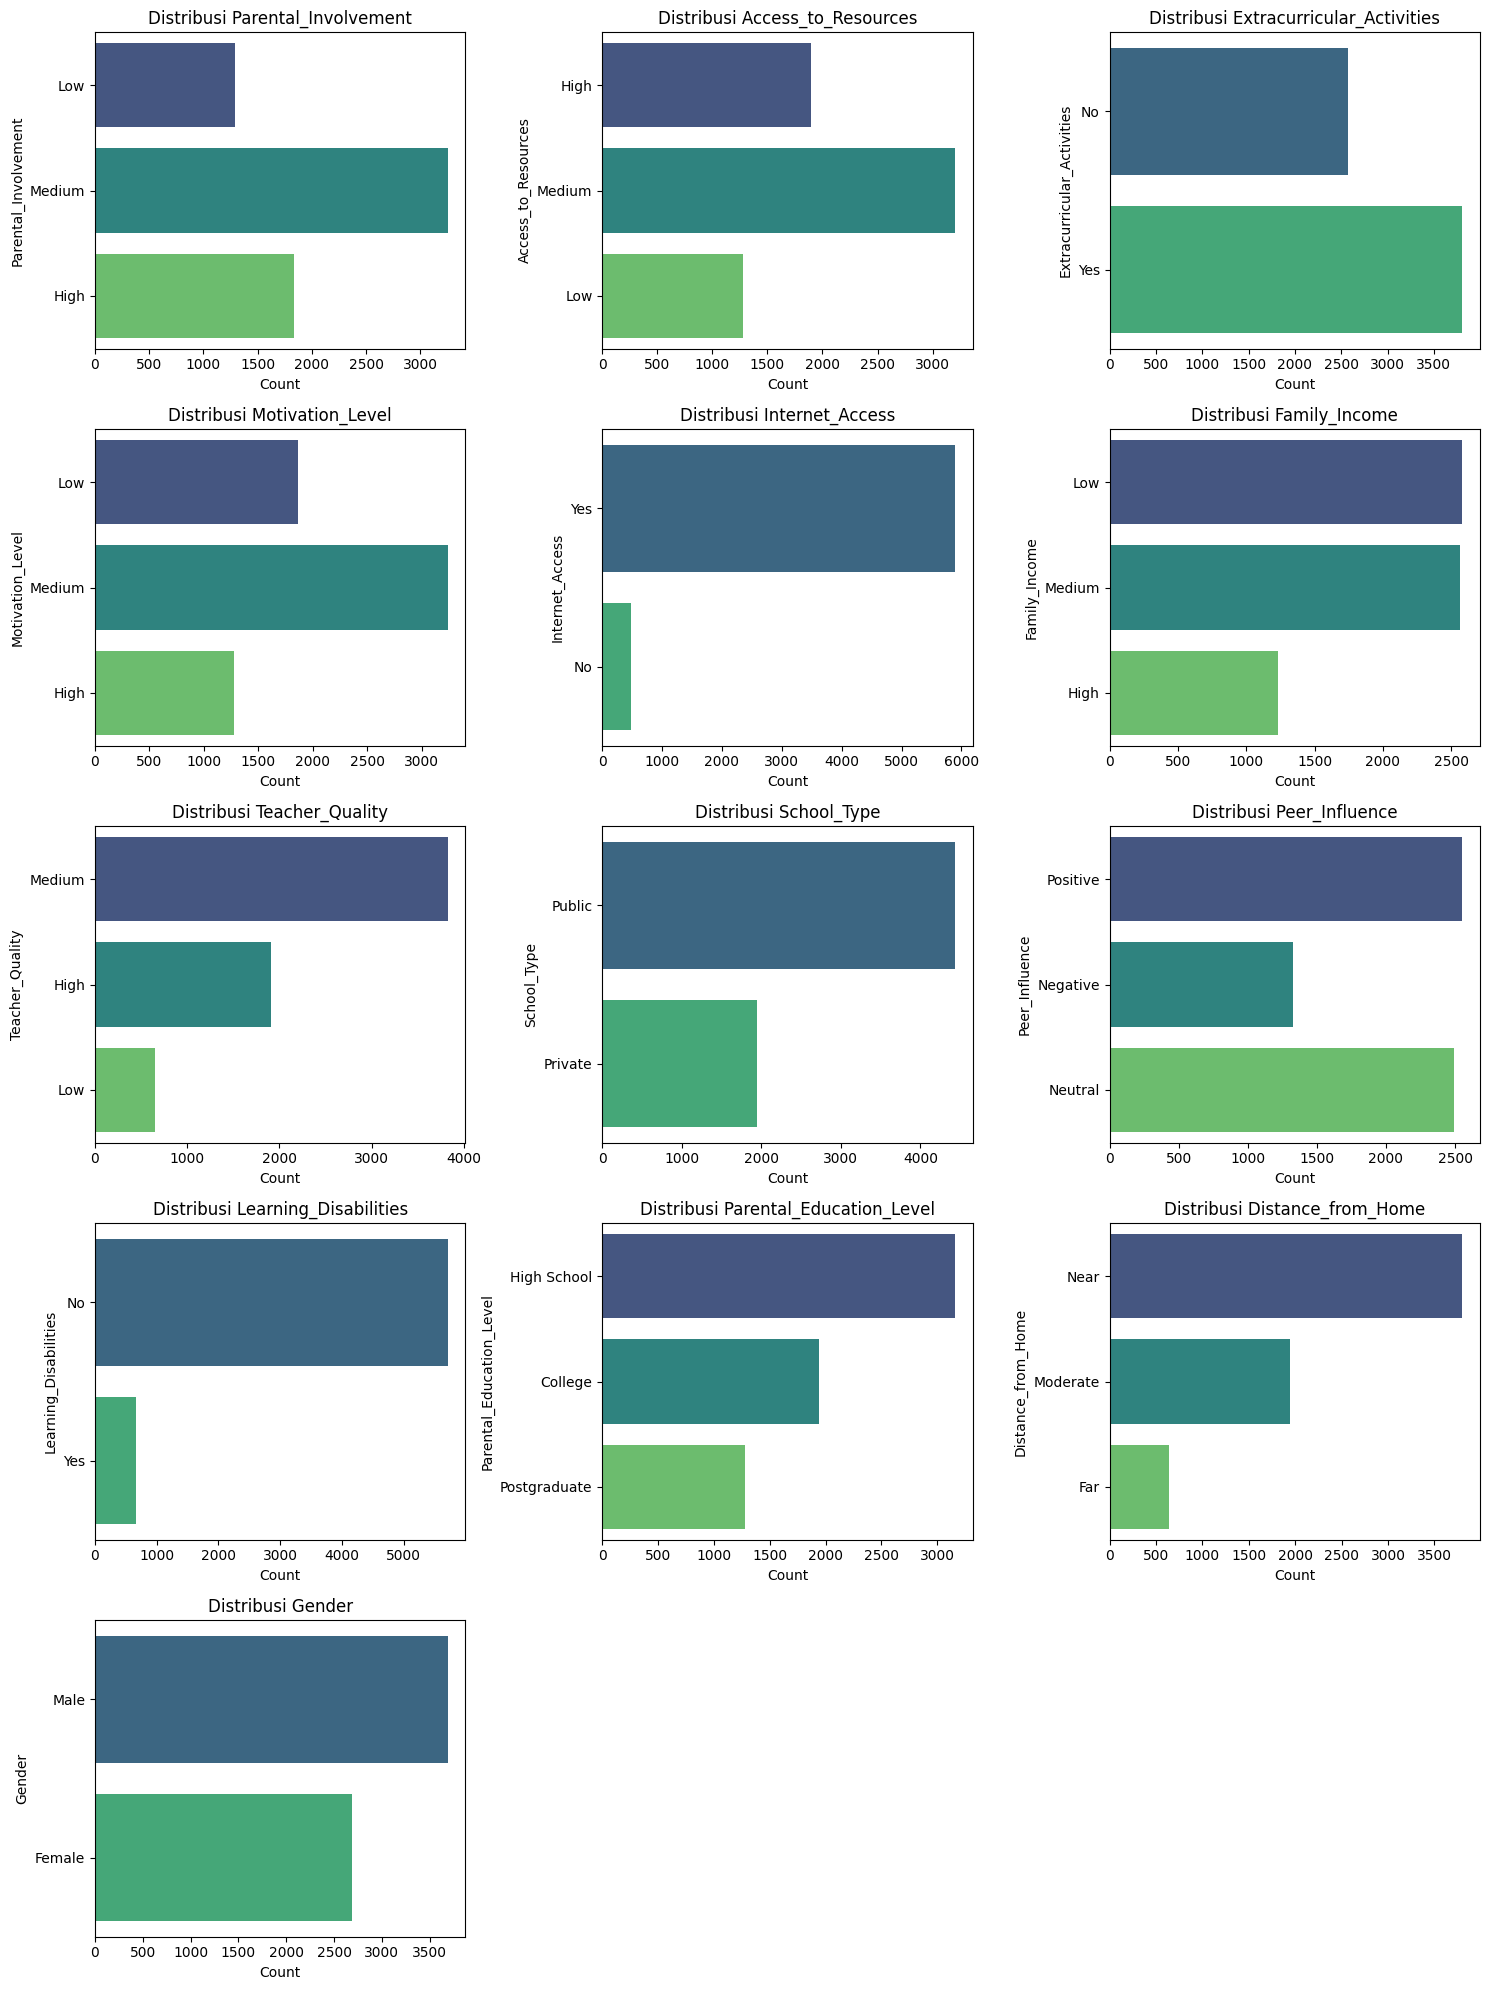

In [34]:
# Visualisasi distribusi untuk variabel kategorikal
plt_cat = plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(y=ds_cleaned[column], palette='viridis')
    plt.title(f'Distribusi {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
plt.tight_layout()

plt_cat.show()

Berdasarkan hasil visualisasi distribusi untuk variabel kategorikal, berikut adalah analisisnya:

1. **Parental_Involvement (Keterlibatan Orang Tua)**
    - Distribusi keterlibatan orang tua menunjukkan bahwa sebagian besar siswa memiliki tingkat keterlibatan orang tua yang sedang (Medium).

2. **Access_to_Resources (Akses ke Sumber Daya)**
    - Sebagian besar siswa memiliki akses ke sumber daya pendidikan yang sedang (Medium).

3. **Extracurricular_Activities (Kegiatan Ekstrakurikuler)**
    - Sebagian besar siswa berpartisipasi dalam kegiatan ekstrakurikuler (Yes).
    - Jumlah siswa yang tidak berpartisipasi dalam kegiatan ekstrakurikuler (No) lebih sedikit.

4. **Motivation_Level (Tingkat Motivasi)**
    - Sebagian besar siswa memiliki tingkat motivasi yang sedang (Medium).

5. **Internet_Access (Akses Internet)**
    - Sebagian besar siswa memiliki akses internet (Yes).
    - Jumlah siswa yang tidak memiliki akses internet (No) lebih sedikit.

6. **Family_Income (Pendapatan Keluarga)**
    - Sebagian besar siswa berasal dari keluarga dengan pendapatan sedang (Medium).

7. **Teacher_Quality (Kualitas Guru)**
    - Sebagian besar siswa menilai kualitas guru mereka sebagai sedang (Medium).

8. **School_Type (Jenis Sekolah)**
    - Sebagian besar siswa bersekolah di sekolah umum (Public).
    - Jumlah siswa yang bersekolah di sekolah privat (Private) lebih sedikit.

9. **Peer_Influence (Pengaruh Teman Sebaya)**
    - Sebagian besar siswa memiliki pengaruh teman sebaya yang positif (Positive).
    - Pengaruh teman sebaya yang netral (Neutral) dan negatif (Negative) memiliki jumlah yang hampir sama.

10. **Learning_Disabilities (Kesulitan Belajar)**
    - Sebagian besar siswa tidak memiliki kesulitan belajar (No).
    - Jumlah siswa yang memiliki kesulitan belajar (Yes) lebih sedikit.

11. **Parental_Education_Level (Tingkat Pendidikan Orang Tua)**
    - Sebagian besar siswa memiliki orang tua dengan tingkat pendidikan sekolah menengah (High School).

12. **Distance_from_Home (Jarak dari Rumah)**
    - Sebagian besar siswa tinggal dekat dengan sekolah (Near).

13. **Gender (Jenis Kelamin)**
    - Distribusi jenis kelamin siswa menunjukkan jumlah yang hampir seimbang antara laki-laki (Male) dan perempuan (Female).

Secara keseluruhan, distribusi variabel kategorikal menunjukkan bahwa sebagian besar siswa memiliki karakteristik yang sedang (Medium) dalam berbagai aspek seperti keterlibatan orang tua, akses ke sumber daya, motivasi, pendapatan keluarga, kualitas guru, dan pengaruh teman sebaya. Selain itu, sebagian besar siswa memiliki akses internet, berpartisipasi dalam kegiatan ekstrakurikuler, tidak memiliki kesulitan belajar, dan tinggal dekat dengan sekolah.

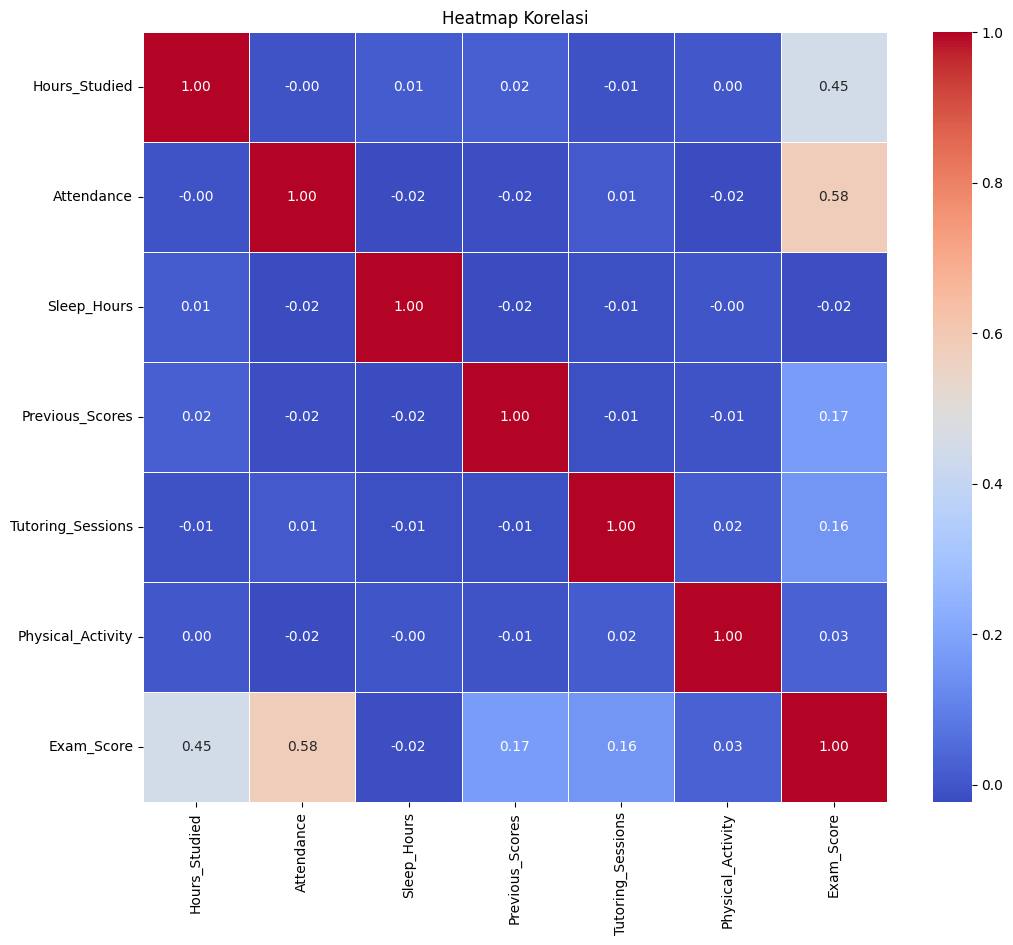

In [35]:
# Heatmap korelasi untuk fitur numerik
plt_corr_matrix = plt.figure(figsize=(12, 10))
correlation = ds_cleaned[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Berdasarkan hasil visualisasi matriks korelasi dari fitur numerik, berikut adalah beberapa analisis yang dapat dilakukan:

1. **Hours_Studied (Jam Belajar)**
    - Korelasi positif yang cukup kuat dengan `Exam_Score` (0.45). Ini menunjukkan bahwa semakin banyak jam belajar siswa, semakin tinggi nilai ujian mereka.

2. **Attendance (Kehadiran)**
    - Korelasi positif yang cukup kuat dengan `Exam_Score` (0.58). Ini menunjukkan bahwa semakin tinggi persentase kehadiran siswa, semakin tinggi nilai ujian mereka.

3. **Sleep_Hours (Jam Tidur)**
    - Korelasi yang sangat lemah dengan semua fitur lainnya, termasuk `Exam_Score` (-0.02). Ini menunjukkan bahwa jumlah jam tidur siswa tidak memiliki pengaruh signifikan terhadap nilai ujian mereka.

4. **Previous_Scores (Nilai Sebelumnya)**
    - Korelasi positif yang lemah dengan `Exam_Score` (0.18). Ini menunjukkan bahwa nilai ujian sebelumnya memiliki sedikit pengaruh terhadap nilai ujian akhir siswa.

5. **Tutoring_Sessions (Sesi Bimbingan)**
    - Korelasi positif yang lemah dengan `Exam_Score` (0.16). Ini menunjukkan bahwa jumlah sesi bimbingan belajar yang dihadiri siswa memiliki sedikit pengaruh terhadap nilai ujian mereka.

6. **Physical_Activity (Aktivitas Fisik)**
    - Korelasi yang sangat lemah dengan semua fitur lainnya, termasuk `Exam_Score` (0.03). Ini menunjukkan bahwa jumlah jam aktivitas fisik siswa tidak memiliki pengaruh signifikan terhadap nilai ujian mereka.

7. **Exam_Score (Nilai Ujian)**
    - Korelasi positif yang cukup kuat dengan `Hours_Studied` (0.45) dan `Attendance` (0.58). Ini menunjukkan bahwa jam belajar dan kehadiran adalah faktor penting yang mempengaruhi nilai ujian siswa.

Secara keseluruhan, dari matriks korelasi ini dapat disimpulkan bahwa `Hours_Studied` dan `Attendance` adalah dua fitur yang memiliki korelasi positif yang cukup kuat dengan `Exam_Score`. Fitur-fitur lainnya memiliki korelasi yang lemah atau sangat lemah dengan `Exam_Score`, menunjukkan bahwa mereka mungkin tidak memiliki pengaruh signifikan terhadap nilai ujian siswa.

## Insight EDA

Berikut adalah beberapa insight yang diperoleh dari tahap Exploratory Data Analysis (EDA) pada notebook ini:

1. **Distribusi Fitur Numerik**:
    - **Hours_Studied (Jam Belajar)**: Rata-rata siswa belajar sekitar 20 jam per minggu. Terdapat beberapa outliers yang belajar lebih dari 40 jam per minggu.
    - **Attendance (Kehadiran)**: Rata-rata kehadiran siswa adalah 80%. Sebagian besar siswa memiliki kehadiran antara 70% hingga 90%.
    - **Sleep_Hours (Jam Tidur)**: Rata-rata siswa tidur sekitar 7 jam per malam. Distribusi jam tidur cenderung normal tanpa outliers signifikan.
    - **Previous_Scores (Nilai Sebelumnya)**: Rata-rata nilai ujian sebelumnya adalah 75. Distribusi nilai cenderung normal tanpa outliers signifikan.
    - **Tutoring_Sessions (Sesi Bimbingan)**: Rata-rata siswa menghadiri sekitar 1.5 sesi bimbingan per bulan. Terdapat beberapa outliers yang menghadiri lebih dari 6 sesi per bulan.
    - **Physical_Activity (Aktivitas Fisik)**: Rata-rata siswa melakukan aktivitas fisik sekitar 3 jam per minggu. Distribusi aktivitas fisik cenderung normal tanpa outliers signifikan.
    - **Exam_Score (Nilai Ujian)**: Rata-rata nilai ujian akhir siswa adalah 67. Terdapat beberapa outliers di bawah 60 dan di atas 90.

2. **Distribusi Fitur Kategorikal**:
    - Sebagian besar siswa memiliki tingkat keterlibatan orang tua, akses ke sumber daya, motivasi, pendapatan keluarga, dan kualitas guru yang sedang (Medium).
    - Sebagian besar siswa memiliki akses internet, berpartisipasi dalam kegiatan ekstrakurikuler, tidak memiliki kesulitan belajar, dan tinggal dekat dengan sekolah.
    - Distribusi jenis kelamin siswa menunjukkan jumlah yang hampir seimbang antara laki-laki dan perempuan.

3. **Korelasi Antar Fitur**:
    - **Hours_Studied (Jam Belajar)** dan **Attendance (Kehadiran)** memiliki korelasi positif yang cukup kuat dengan **Exam_Score (Nilai Ujian)**. Ini menunjukkan bahwa semakin banyak jam belajar dan semakin tinggi kehadiran siswa, semakin tinggi nilai ujian mereka.
    - Fitur-fitur lainnya memiliki korelasi yang lemah atau sangat lemah dengan **Exam_Score**, menunjukkan bahwa mereka mungkin tidak memiliki pengaruh signifikan terhadap nilai ujian siswa.

4. **Penanganan Data yang Hilang**:
    - Data yang hilang hanya sebesar 3.56%, sehingga dilakukan teknik drop pada baris yang memiliki data yang hilang.

5. **Anomali Nilai**:
    - Terdapat anomali nilai maksimum pada **Exam_Score** yang mencapai 101. Nilai ini telah diganti menjadi 100 untuk mengatasi kemungkinan kesalahan input.

Insight-insight ini memberikan gambaran menyeluruh tentang karakteristik data dan hubungan antar fitur, yang dapat membantu dalam analisis lebih lanjut dan pembuatan model prediktif.

# 5. Data Preprocessing

## Mengidentifikasi baris duplikat

In [ ]:
duplicates = ds_cleaned.duplicated()
 
print("Baris duplikat:")
print(ds_cleaned[duplicates])

## Mengatasi anomali nilai max pada Exam_Score

In [ ]:
# mengganti nilai 101 menjadi 100 pada Exam_Score
ds_cleaned['Exam_Score'] = ds_cleaned['Exam_Score'].replace(101, 100)

# cek kembali data tipe numerikal
ds_cleaned[numerical_cols].describe().T

In [ ]:
ds_cleaned.info()